In [2]:
!pip install dgl

     |████████████████████████████████| 3.0MB 2.6MB/s 


In [0]:
import networkx as nx
import dgl
import matplotlib.pyplot as plt

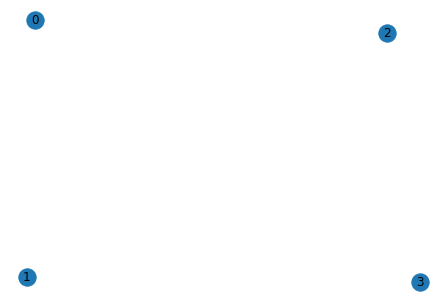

In [6]:
#Creating the Di Graph
G=nx.DiGraph()
G.add_nodes_from([0,1,2,3])
nx.draw(G, with_labels=True)
plt.show()

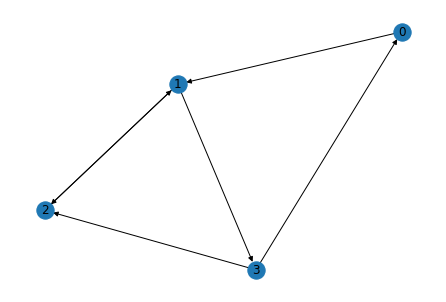

In [8]:
G.add_edges_from([(0,1),(1,3),(2,1),(3,0),(3,2),(1,2)])
nx.draw(G, with_labels=True)
plt.show()

In [0]:
import numpy as np
#Creating the adjacency matrix
A = np.matrix([
    [0, 1, 0, 0],
    [0, 0, 1, 1], 
    [0, 1, 0, 0],
    [1, 0, 1, 0]],
    dtype=float
)

In [10]:
#Features for every node based on its index
X = np.matrix([
            [i, -i]
            for i in range(A.shape[0])], dtype=float)
X

matrix([[ 0.,  0.],
        [ 1., -1.],
        [ 2., -2.],
        [ 3., -3.]])

In [11]:
#Applying the propogation rule
A * X

matrix([[ 1., -1.],
        [ 5., -5.],
        [ 1., -1.],
        [ 2., -2.]])

In [12]:
I = np.matrix(np.eye(A.shape[0]))
I

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [13]:
#Adding self loops 
A_hat = A + I
A_hat * X

matrix([[ 1., -1.],
        [ 6., -6.],
        [ 3., -3.],
        [ 5., -5.]])

In [14]:
#Degree matrix
D = np.array(np.sum(A, axis=0))[0]
D = np.matrix(np.diag(D))
D

matrix([[1., 0., 0., 0.],
        [0., 2., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 1.]])

In [17]:
#Normalizing the feature representations
D**-1 * A

matrix([[0. , 1. , 0. , 0. ],
        [0. , 0. , 0.5, 0.5],
        [0. , 0.5, 0. , 0. ],
        [1. , 0. , 1. , 0. ]])

In [18]:
#Propogation rule with the transformed adjacency matrix
D**-1 * A * X

matrix([[ 1. , -1. ],
        [ 2.5, -2.5],
        [ 0.5, -0.5],
        [ 2. , -2. ]])

In [0]:
W = np.matrix([
             [1, -1],
             [-1, 1]])

In [22]:
#Degree matrix
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
D_hat

matrix([[2., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 0., 3., 0.],
        [0., 0., 0., 2.]])

In [23]:
#Adding the weights
D_hat**-1 * A_hat * X * W

matrix([[ 1., -1.],
        [ 4., -4.],
        [ 2., -2.],
        [ 5., -5.]])

In [29]:
#Degree matrix
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat**-0.5))
D_hat

matrix([[0.70710678, 0.        , 0.        , 0.        ],
        [0.        , 0.57735027, 0.        , 0.        ],
        [0.        , 0.        , 0.57735027, 0.        ],
        [0.        , 0.        , 0.        , 0.70710678]])

In [30]:
#Spectral rule
D_hat* A_hat * D_hat*X 

matrix([[ 0.40824829, -0.40824829],
        [ 2.22474487, -2.22474487],
        [ 1.        , -1.        ],
        [ 2.31649658, -2.31649658]])

In [31]:
#Spectral rule
D_hat* A_hat * D_hat*X*W 

matrix([[ 0.81649658, -0.81649658],
        [ 4.44948974, -4.44948974],
        [ 2.        , -2.        ],
        [ 4.63299316, -4.63299316]])